In [97]:
import numpy as np

In [98]:
import pandas as pd

In [99]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [100]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [101]:
df.shape

(271116, 15)

In [102]:
df = df[df['Season'] == 'Summer']


In [103]:
df.shape

(222552, 15)

In [104]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [105]:
df = df.merge(region_df, how = 'left', on = 'NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [106]:
df['region'].unique().shape

(206,)

In [107]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [108]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [109]:
df.duplicated().sum()

np.int64(1385)

In [110]:
df.drop_duplicates(inplace = True)

In [111]:
df.duplicated().sum()

np.int64(0)

In [112]:
df.shape

(221167, 17)

In [113]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [114]:
pd.get_dummies(df['Medal']).astype(int)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [115]:
df = pd.concat([df, pd.get_dummies(df['Medal']).astype(int)], axis=1)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [116]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [117]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [118]:
medal_tally = df.drop_duplicates(subset=['Team','Games', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [119]:
medal_tally

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [120]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()

In [121]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [122]:
medal_tally

,NOC,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,WIF,0,0,2,2
226,YEM,0,0,0,0
227,YAR,0,0,0,0
228,YMD,0,0,0,0


In [123]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,Gold,Silver,Bronze,Total
50,IND,9,7,12,28


In [124]:
years = df['Year'].unique().tolist()

In [125]:
years.sort()

In [126]:
years.insert(0,'Overall')

In [127]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [128]:
country = np.unique(df['region'].dropna().values).tolist()

In [129]:
country.sort()

In [130]:
country.insert(0, 'Overall')

In [131]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [132]:
medal_df = df.drop_duplicates(subset=['Team','Games', 'NOC', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [133]:
medal_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


In [134]:
# def fetch_medal_tally(year,country):
#     if year == 'Overall' and country == 'Overall':
#         temp_df = medal_df
#     if year == 'Overall' and country != 'Overall':
#         temp_df = medal_df[medal_df['region'] == country]
#     if year != 'Overall' and country == 'Overall':
#         temp_df = medal_df[medal_df['Year'] == year]
#     if year != 'Overall' and country != 'Overall':
#         temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

#     x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()
#     x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']

#     print(x)

In [135]:
# fetch_medal_tally( year = 2008, country = 'Overall')

In [136]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

In [137]:
fetch_medal_tally(df, year = 'Overall', country = 'India')

,Year,Gold,Silver,Bronze,total
0,1900,0,2,0,2
1,1920,0,0,0,0
2,1924,0,0,0,0
3,1928,1,0,0,1
4,1932,1,0,0,1
5,1936,1,0,0,1
6,1948,1,0,0,1
7,1952,1,0,1,2
8,1956,1,0,0,1
9,1960,0,1,0,1


Overall Analysis


In [138]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [139]:
df['Year'].unique().shape[0]-1   #bcoz of 1906 games

28

In [140]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [141]:
df['Sport'].unique().shape

(52,)

In [142]:
df['Event'].unique().shape

(651,)

In [143]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [144]:
df['Name'].unique().shape

(116122,)

In [145]:
df['region'].unique().shape

(206,)

In [146]:
# nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index()

# nations_over_time.columns = ['Year', 'count']

# nations_over_time = nations_over_time.sort_values('Year')


In [147]:
# nations_over_time

In [148]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [149]:
nations_over_time

,Year,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
23,1912,29
24,1920,29
21,1924,45
20,1928,46
19,1932,47


In [150]:
import plotly.express as px

In [151]:
# fig = px.line(nations_over_time, x='Year', y='count')
# fig.show()

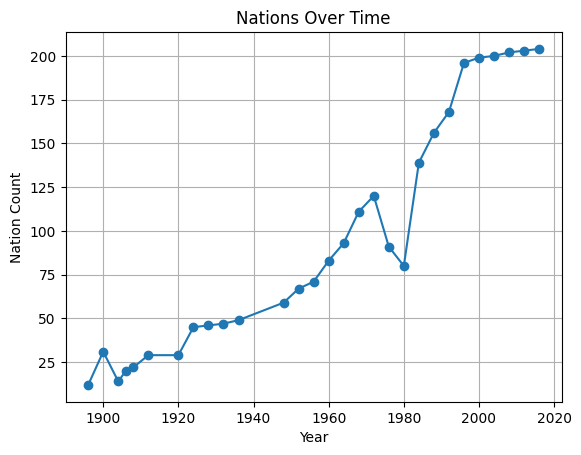

In [152]:
import matplotlib.pyplot as plt

plt.plot(nations_over_time['Year'], nations_over_time['count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Nation Count')
plt.title('Nations Over Time')
plt.grid(True)
plt.show()


In [153]:
event_over_time = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

In [154]:
event_over_time

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [155]:
# fig = px.line(event_over_time, x='Year', y='count')
# fig.show()

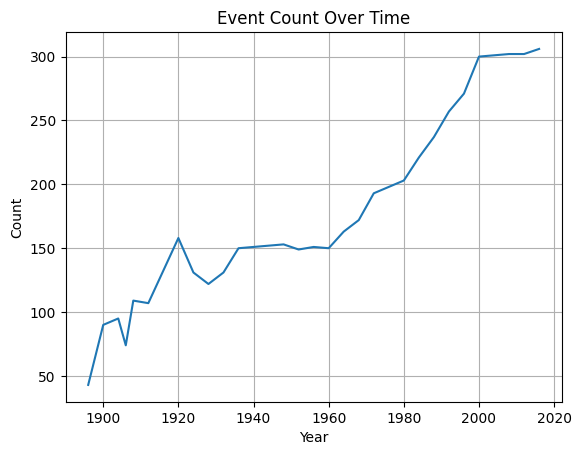

In [156]:
import matplotlib.pyplot as plt

plt.plot(event_over_time['Year'], event_over_time['count'])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Event Count Over Time")
plt.grid()
plt.show()


In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
x= df.drop_duplicates(['Year', 'Sport', 'Event'])

In [159]:
x

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160449,97860,Lonce Gaston Quentin,M,40.0,NaN,NaN,France,FRA,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 28 metres, Indiv...",Silver,France,NaN,0,0,1
161311,98435,Ioannis Raisis,M,NaN,NaN,NaN,Greece,GRE,1906 Summer,1906,Summer,Athina,Fencing,"Fencing Men's Sabre, Masters, Individual",Silver,Greece,NaN,0,0,1
175283,107029,Franz Xaver Schmid,M,27.0,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Alpinism,Alpinism Mixed Alpinism,Gold,Germany,NaN,0,1,0
176005,107506,Hermann Schreiber,M,26.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Aeronautics,Aeronautics Mixed Aeronautics,Gold,Switzerland,NaN,0,1,0


In [160]:
x.pivot_table(index='Sport', columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

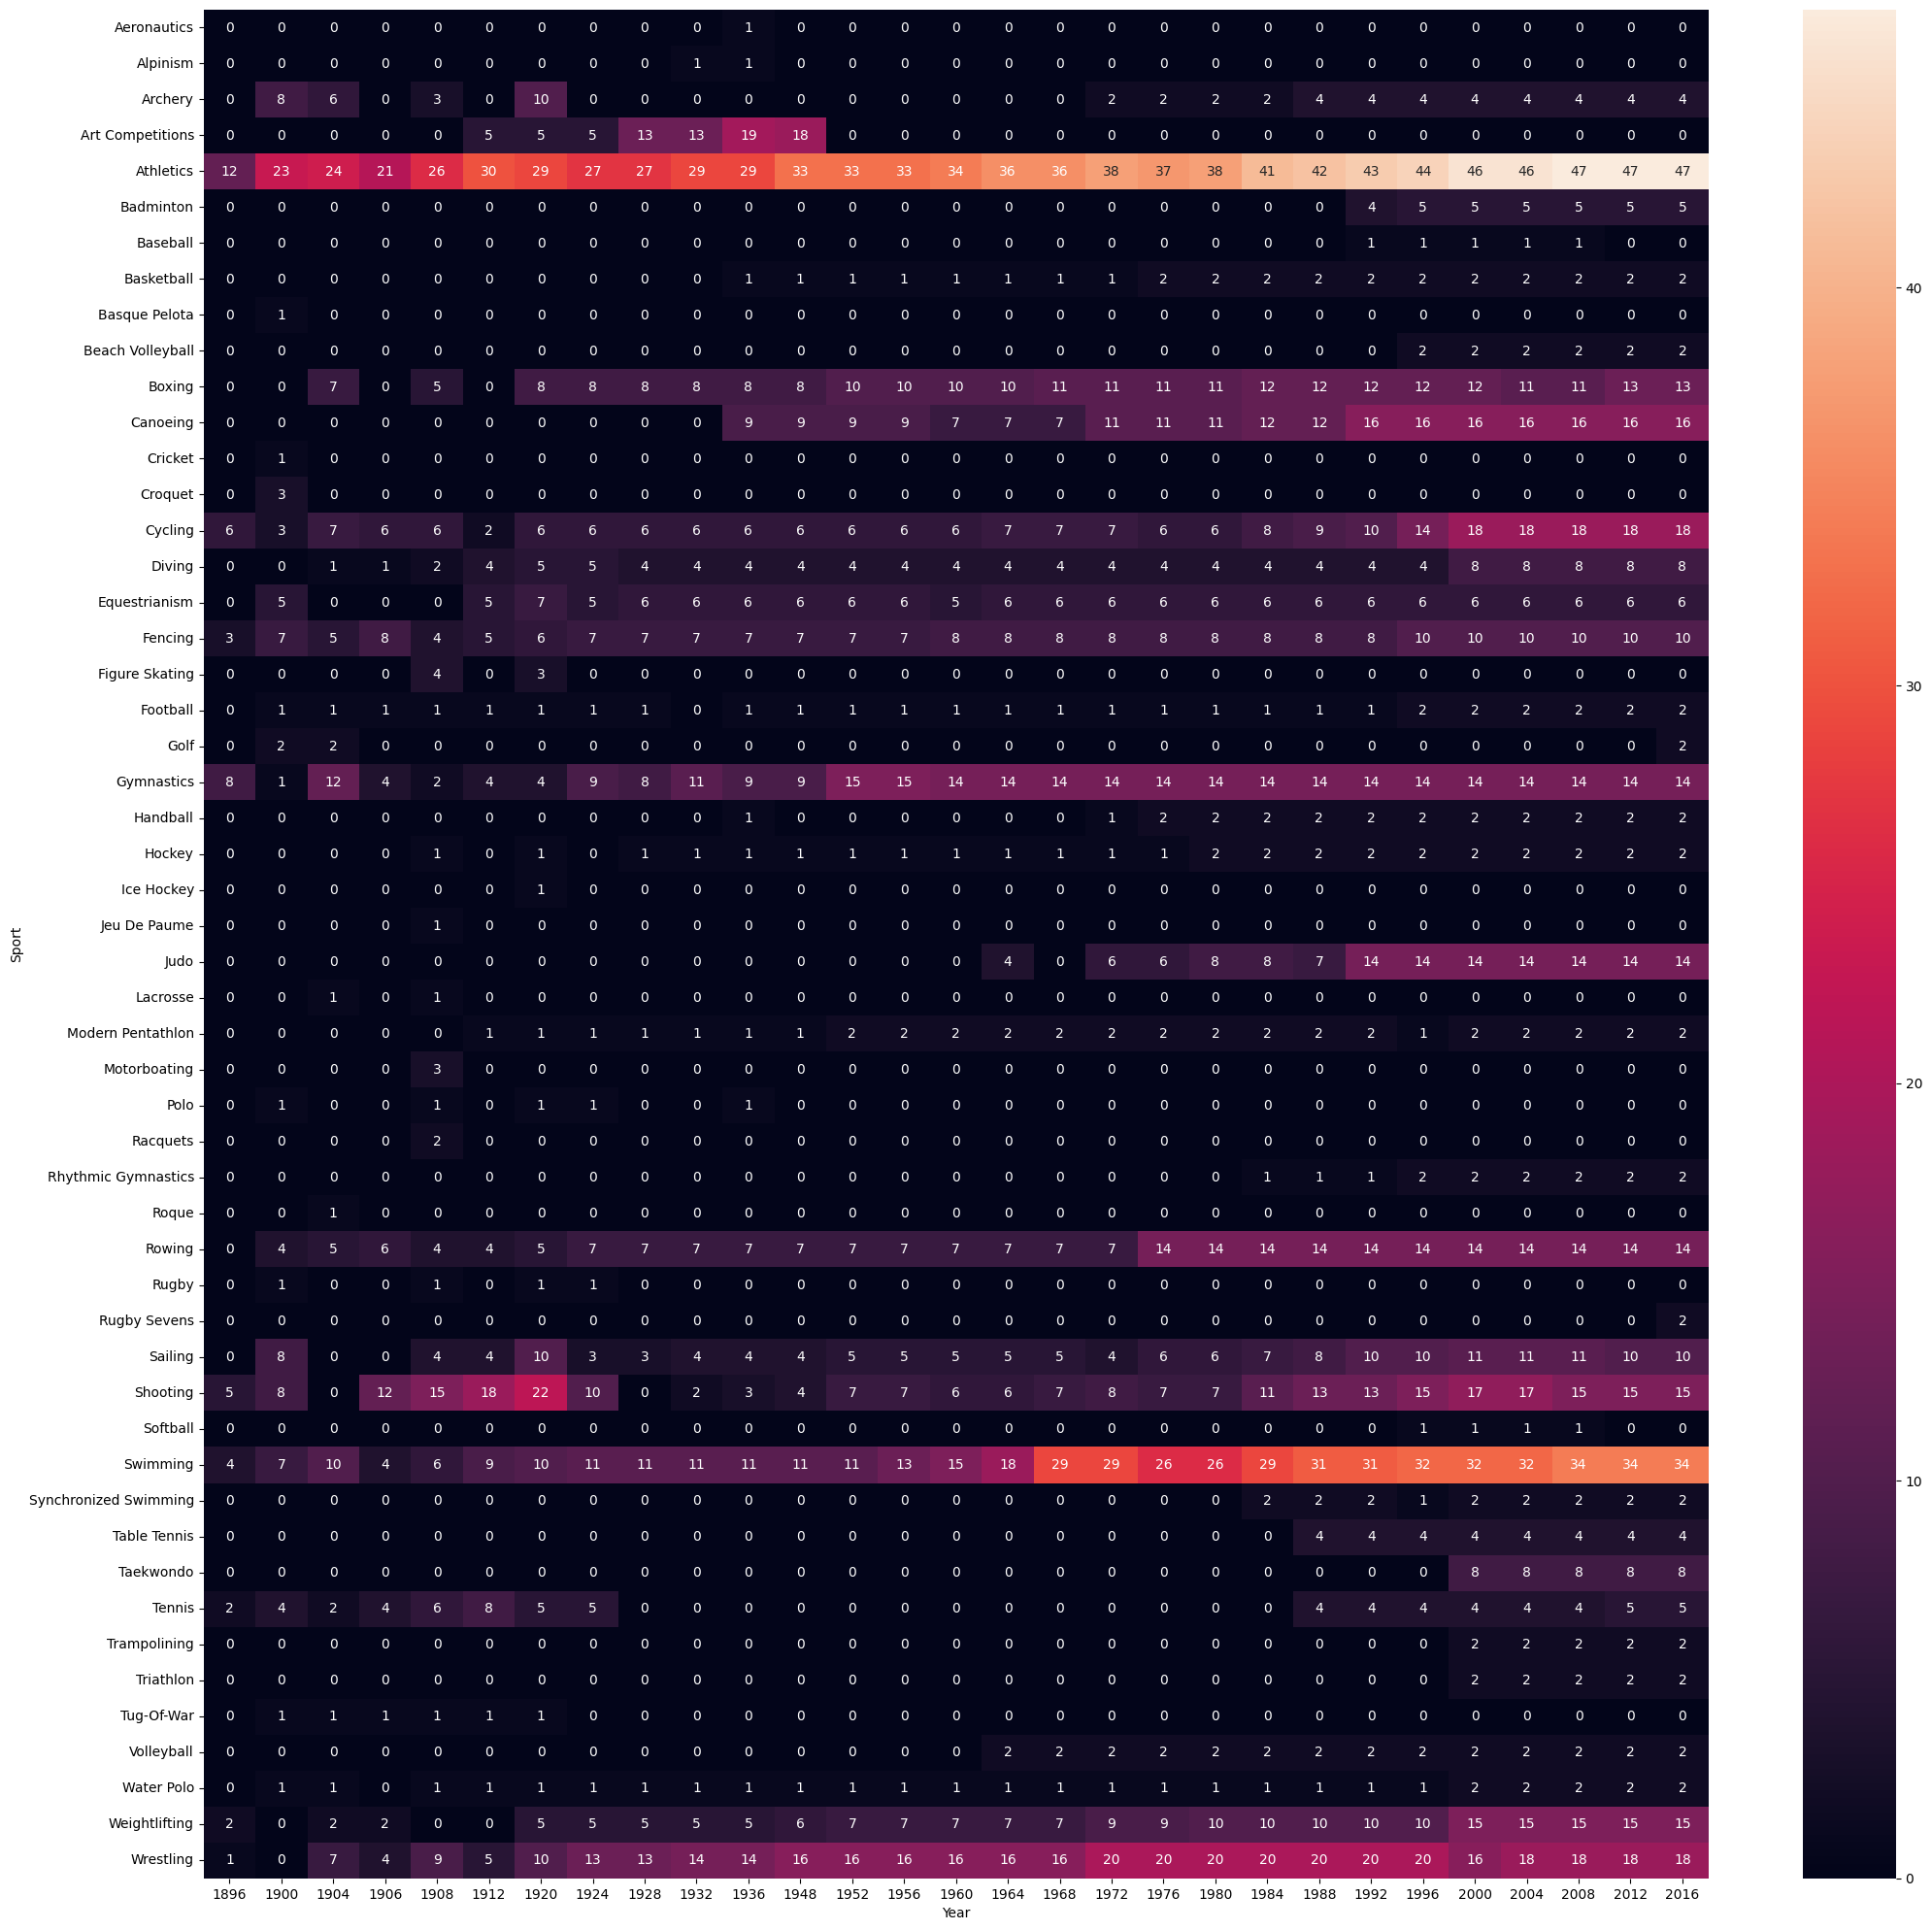

In [161]:
plt.figure(figsize=(25, 25))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int), annot=True)

In [162]:
def most_successful(df,sport):
    temp_df = df.dropna(subset = ['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']== sport]

    x = temp_df['Name'].value_counts().reset_index().head(10).merge(df, left_on = 'index', right_on = 'Name', how = 'left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index').head(10)  

In [163]:
def most_successful(df,sport):
    temp_df = df.dropna(subset = ['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']== sport]

    return temp_df['Name'].value_counts()

In [164]:
most_successful(df, 'Athletics')

Name
Paavo Johannes Nurmi                                  12
Raymond Clarence "Ray" Ewry                           10
Frederick Carlton "Carl" Lewis                        10
Merlene Joyce Ottey-Page                               9
Allyson Michelle Felix                                 9
                                                      ..
Fatima Yusuf-Olukoju                                   1
Juan Carlos Zabala Boyer                               1
Claudia Hildegard Zaczkiewicz (Reidick-, -Reidick)     1
Derrick Ralph Adkins                                   1
Olapade Charles Adeniken                               1
Name: count, Length: 2842, dtype: int64

In [165]:
def most_successful(df,sport):
    temp_df = df.dropna(subset = ['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']== sport]
    temp_df = temp_df[['Name', 'Medal']]

    final =  temp_df['Name'].value_counts().reset_index().head(10).merge(df,left_on='Name',right_on='Name', how='left')
    return final

In [166]:
most_successful(df,'Football').head(5)

,Name,count,ID,Sex,Age,Height,Weight,Team,NOC,Games,...,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,Christie Patricia Pearce-Rampone,4,92507,F,25.0,168.0,64.0,United States,USA,2000 Summer,...,Summer,Sydney,Football,Football Women's Football,Silver,USA,NaN,0,0,1
1,Christie Patricia Pearce-Rampone,4,92507,F,29.0,168.0,64.0,United States,USA,2004 Summer,...,Summer,Athina,Football,Football Women's Football,Gold,USA,NaN,0,1,0
2,Christie Patricia Pearce-Rampone,4,92507,F,33.0,168.0,64.0,United States,USA,2008 Summer,...,Summer,Beijing,Football,Football Women's Football,Gold,USA,NaN,0,1,0
3,Christie Patricia Pearce-Rampone,4,92507,F,37.0,168.0,64.0,United States,USA,2012 Summer,...,Summer,London,Football,Football Women's Football,Gold,USA,NaN,0,1,0
4,Shannon Leigh Boxx,3,14299,F,27.0,172.0,67.0,United States,USA,2004 Summer,...,Summer,Athina,Football,Football Women's Football,Gold,USA,NaN,0,1,0


In [167]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='Name', right_on='Name', how='left')[
        ['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')
    x.rename(columns={'count': 'Medals'}, inplace=True)
    return x

In [168]:
most_successful(df,'Football')

,Name,Medals,Sport,region
0,Christie Patricia Pearce-Rampone,4,Football,USA
4,Shannon Leigh Boxx,3,Football,USA
7,Renate Lingor,3,Football,Germany
11,Julie Maurine Foudy,3,Football,USA
14,"Mariel Margaret ""Mia"" Hamm (-Corry, -Garciaparra)",3,Football,USA
17,Ariane Hingst,3,Football,Germany
20,Kristine Marie Lilly (-Heavey),3,Football,USA
23,Brandi Denise Chastain,3,Football,USA
26,Joy Lynn Fawcett (Biefeld-),3,Football,USA
29,Charles von Buchwald,3,Football,Denmark


In [169]:
temp2_df = df.dropna(subset = ['Medal'])
temp2_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0


In [170]:
temp2_df = temp2_df[temp2_df['Sport'] == 'Swimming']
temp2_df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
148,100,Oszkr Abay-Nemes,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze,Hungary,NaN,1,0,0
407,259,Reema Abdo,F,21.0,173.0,59.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,Canada,NaN,1,0,0
649,424,Moira Abernethy (-Ford),F,17.0,NaN,NaN,South Africa,RSA,1956 Summer,1956,Summer,Melbourne,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,South Africa,NaN,1,0,0


In [171]:
temp2_df['Name'].value_counts().reset_index().head(10)

,Name,count
0,"Michael Fred Phelps, II",28
1,"Dara Grace Torres (-Hoffman, -Minas)",12
2,Natalie Anne Coughlin (-Hall),12
3,Ryan Steven Lochte,12
4,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12
5,Mark Andrew Spitz,11
6,"Matthew Nicholas ""Matt"" Biondi",11
7,"Gary Wayne Hall, Jr.",10
8,Franziska van Almsick,10
9,Ian James Thorpe,9


In [172]:
comb_df = temp2_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='Name', right_on='Name', how='left')

comb_df.head(2)

,Name,count,ID,Sex,Age,Height,Weight,Team,NOC,Games,...,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,"Michael Fred Phelps, II",28,94406,M,15.0,193.0,91.0,United States,USA,2000 Summer,...,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN,USA,NaN,0,0,0
1,"Michael Fred Phelps, II",28,94406,M,19.0,193.0,91.0,United States,USA,2004 Summer,...,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze,USA,NaN,1,0,0


In [173]:
comb_df[
['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
43,Natalie Anne Coughlin (-Hall),12,Swimming,USA
55,Ryan Steven Lochte,12,Swimming,USA
69,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
86,Mark Andrew Spitz,11,Swimming,USA
98,"Matthew Nicholas ""Matt"" Biondi",11,Swimming,USA
110,"Gary Wayne Hall, Jr.",10,Swimming,USA
120,Franziska van Almsick,10,Swimming,Germany
143,Ian James Thorpe,9,Swimming,Australia


In [174]:
comb_df = temp2_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='Name', right_on='Name', how='left')[
['Name', 'count', 'Sport', 'region']].drop_duplicates('Name')

comb_df.head(5)

,Name,count,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
43,Natalie Anne Coughlin (-Hall),12,Swimming,USA
55,Ryan Steven Lochte,12,Swimming,USA
69,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA


Country Wise Analysis

In [175]:
temp3_df = df.dropna(subset=['Medal'])
temp3_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

newdf = temp3_df[temp3_df['region'] == 'India']
final_df = newdf.groupby('Year').count()['Medal'].reset_index()

final_df.head(2)

,Year,Medal
0,1900,2
1,1928,1


In [176]:
def yearwise_medal_tally(df,country):
    temp3_df = df.dropna(subset=['Medal'])
    temp3_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

    newdf = temp3_df[temp3_df['region'] == country]
    final_df = newdf.groupby('Year').count()['Medal'].reset_index()

    return final_df

In [177]:
yearwise_medal_tally(df,'USA')

,Year,Medal
0,1896,19
1,1900,54
2,1904,231
3,1906,23
4,1908,46
5,1912,63
6,1920,95
7,1924,99
8,1928,56
9,1932,110


In [178]:
def most_successful_countrywise(df, country):
    temp3_df = df.dropna(subset=['Medal'])

    temp3_df = temp3_df[temp3_df['region'] == country]

    x = temp3_df['Name'].value_counts().reset_index().head(10).merge(df, left_on='Name', right_on='Name', how='left')[
        ['Name', 'count', 'Sport']].drop_duplicates('Name')
    x.rename(columns={'count': 'Medals'}, inplace=True)
    return x


In [179]:
most_successful_countrywise(df,'China')

,Name,Medals,Sport
0,Yang Wei,7,Badminton
26,Wu Minxia,7,Diving
33,Wang Yifu,6,Shooting
43,Wang Hao,6,Table Tennis
54,Sun Yang,6,Swimming
64,Li Xiaoshuang,6,Gymnastics
80,Li Ning,6,Gymnastics
96,Zou Kai,6,Gymnastics
104,Guo Jingjing,6,Diving
111,Li Xiaopeng,5,Gymnastics


Athlete wise analysis

In [180]:
import plotly.figure_factory as ff

In [181]:
athlete_df = df.drop_duplicates(subset=['Name','region'])
athlete_df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [182]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [183]:
fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'],show_hist=False, show_rug=False)
fig.update_layout(autosize=False,width=1000,height=600)



In [184]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
    
for sport in famous_sports:
        temp_df = athlete_df[athlete_df['Sport'] == sport]
        x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
        name.append(sport)

    


In [185]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)


In [186]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()


In [187]:
men.head(2)

,Year,Name
0,1896,174
1,1900,1181


In [188]:
women.head(2)

,Year,Name
0,1900,23
1,1904,6


In [189]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)
final.fillna(0, inplace=True)

final.head()

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0


In [190]:
def men_vs_women(df):
    athlete_df = df.drop_duplicates(subset=['Name', 'region'])

    men = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
    women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

    final = men.merge(women, on='Year', how='left')
    final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)

    final.fillna(0, inplace=True)

    return final

In [191]:
men_vs_women(df)

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0
